<img src="https://media-exp1.licdn.com/dms/image/C4D0BAQFf6-LzAW8jUg/company-logo_200_200/0?e=1602115200&v=beta&t=lIkM2SzW5yCTULsgW49JwacZZhm8gNNQkNVcgtqRXwk">

<h1><center>Data Analysis Skill Test</center></h1>

<h2><center>Case 2</center></h2>
<h2><center>Parte II - Respostas</center></h2>

In [1]:
# Carregar pacotes
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# plot no jupyter notebook
%matplotlib inline

# estilo dos gráficos
plt.style.use('seaborn-darkgrid')

In [2]:
# Importar dados
df_comexstat = pd.read_csv('./data/data_comexstat.csv', engine='python')

### 1) Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’;

In [3]:
# Manipular os dados
df_comexstat['month'] = pd.DatetimeIndex(df_comexstat['date']).month
df_comexstat['year'] = pd.DatetimeIndex(df_comexstat['date']).year
evol_exp_br = df_comexstat[df_comexstat['type'] == 'Export']
evol_exp_br_year = evol_exp_br.groupby(['year','product'])['tons','usd'].sum().reset_index()
evol_exp_br_month = evol_exp_br.groupby(['month','year','product'])['tons','usd'].sum().reset_index()

# Definir grupo de produtos
select_prod = ['soybeans','soybean_oil','soybean_meal']

In [4]:
print(evol_exp_br_year.shape)
evol_exp_br_year.head()

(131, 4)


,year,product,tons,usd
0,1997,corn,356895.029,5.163493e+07
1,1997,soybean_meal,9965945.186,2.668177e+09
2,1997,soybean_oil,1117451.178,5.923224e+08
3,1997,soybeans,8195025.114,2.407409e+09
4,1997,sugar,2521669.683,7.242544e+08


In [5]:
print(evol_exp_br_month.shape)
evol_exp_br_month.head()

(1513, 5)


,month,year,product,tons,usd
0,1,1997,corn,170407.730,20625304.0
1,1,1997,soybean_meal,486775.060,133239012.0
2,1,1997,soybean_oil,66915.872,34717077.0
3,1,1997,soybeans,14030.000,4118740.0
4,1,1997,sugar,137983.295,40444174.0


#### Evolução anual

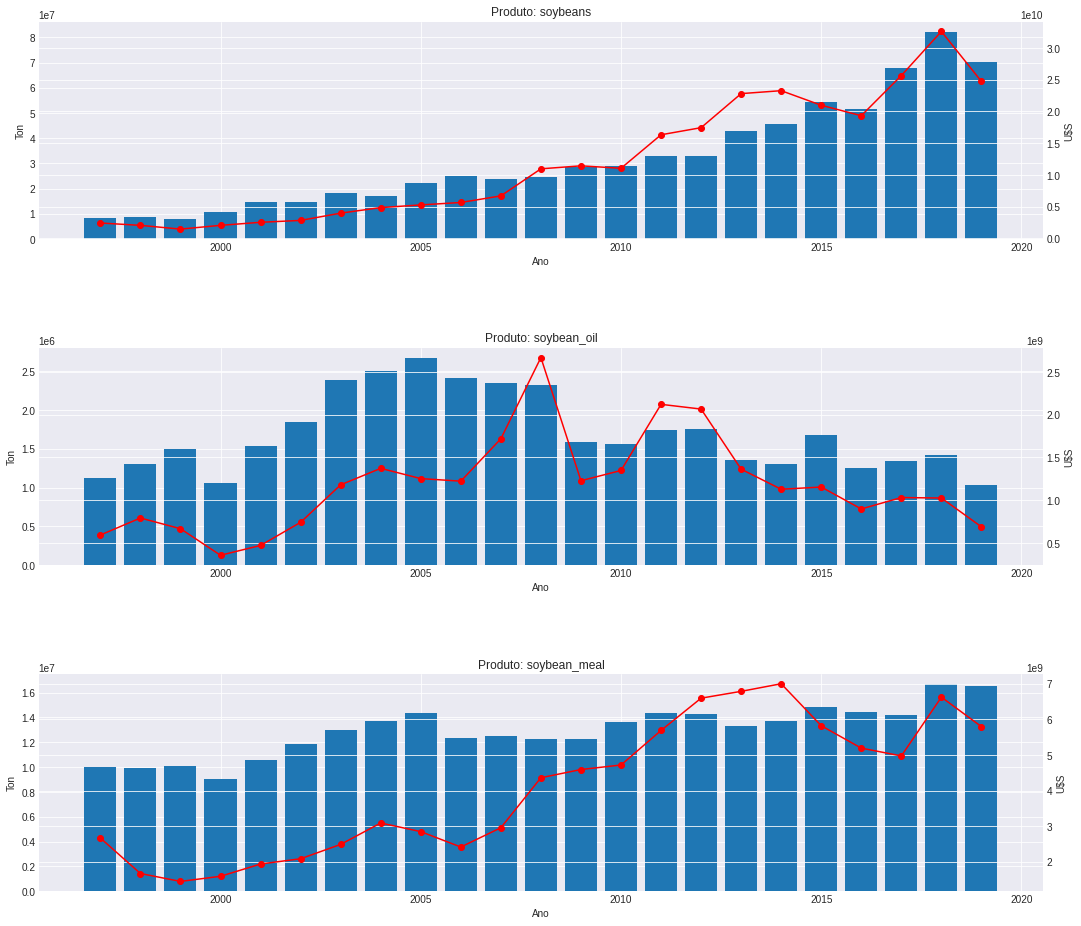

In [6]:
# definir tamanho plot
plt.figure(figsize=(18,16))
plt.subplots_adjust(hspace=0.5)

# Iteração para visualizar cada estado
for i,produto in enumerate(select_prod):
    
    ax1 = plt.subplot(3,1,i+1)

    current_df = evol_exp_br_year[evol_exp_br_year['product']==produto]

    # Plot bar toneladas
    ax1.bar(current_df.year, current_df.tons)
    ax1.set_xlabel('Ano')
    ax1.set_ylabel('Ton')

    # Plot line preço - eixo y secundário
    ax2 = ax1.twinx()
    ax2.plot(current_df.year,current_df.usd, 'r-o')
    ax2.set_ylabel('U$S')
    plt.title("Produto: "+ produto)


plt.show()

# Evolução mensal

In [7]:
# Funcao para visualizar toneladas e preços por estado e produto
def plot_evol_mensal_exp(dataframe, var_iterate, var_filter):
    # definir tamanho plot
    plt.figure(figsize=(18,16))
    plt.subplots_adjust(hspace=0.5)
    
    # imprimir produto atual
    print("Produto: ", var_filter)
    
    # Iteração para visualizar cada estado
    for i,ano in enumerate(var_iterate):

        ax1 = plt.subplot(9,3,i+1)

        current_df = dataframe[(dataframe['year']==ano) &
                                       (dataframe['product']==var_filter)]
        
        # Plot bar toneladas
        ax1.bar(current_df.month, current_df.tons)
        
        # Plot line preço - eixo y secundário
        ax2 = ax1.twinx()
        ax2.plot(current_df.month,current_df.usd, 'r-o')
        
        # Titulo = estado
        plt.title(ano)

    plt.show()

Produto:  soybeans


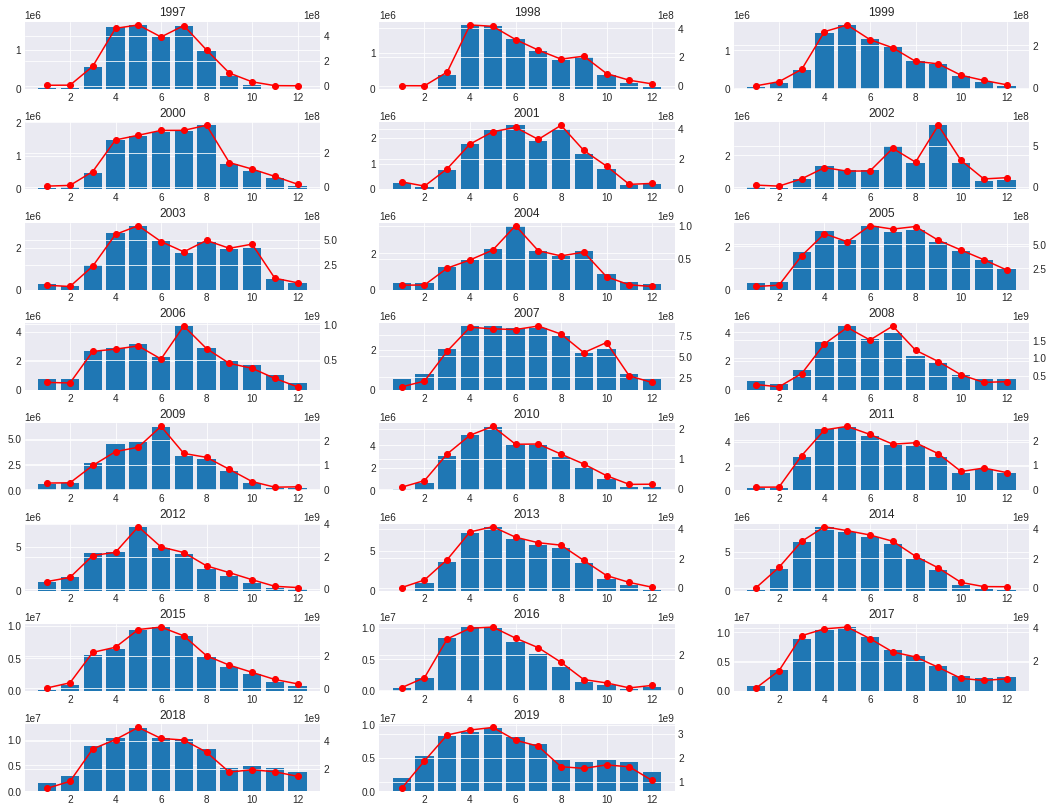

Produto:  soybean_oil


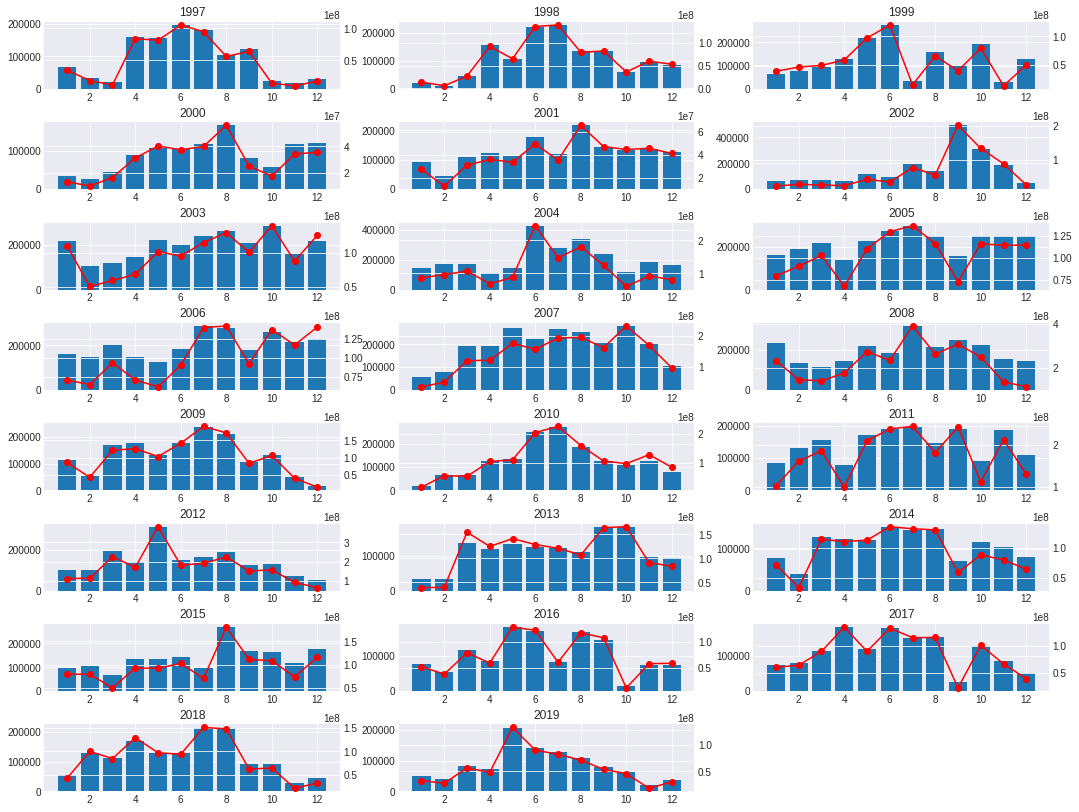

Produto:  soybean_meal


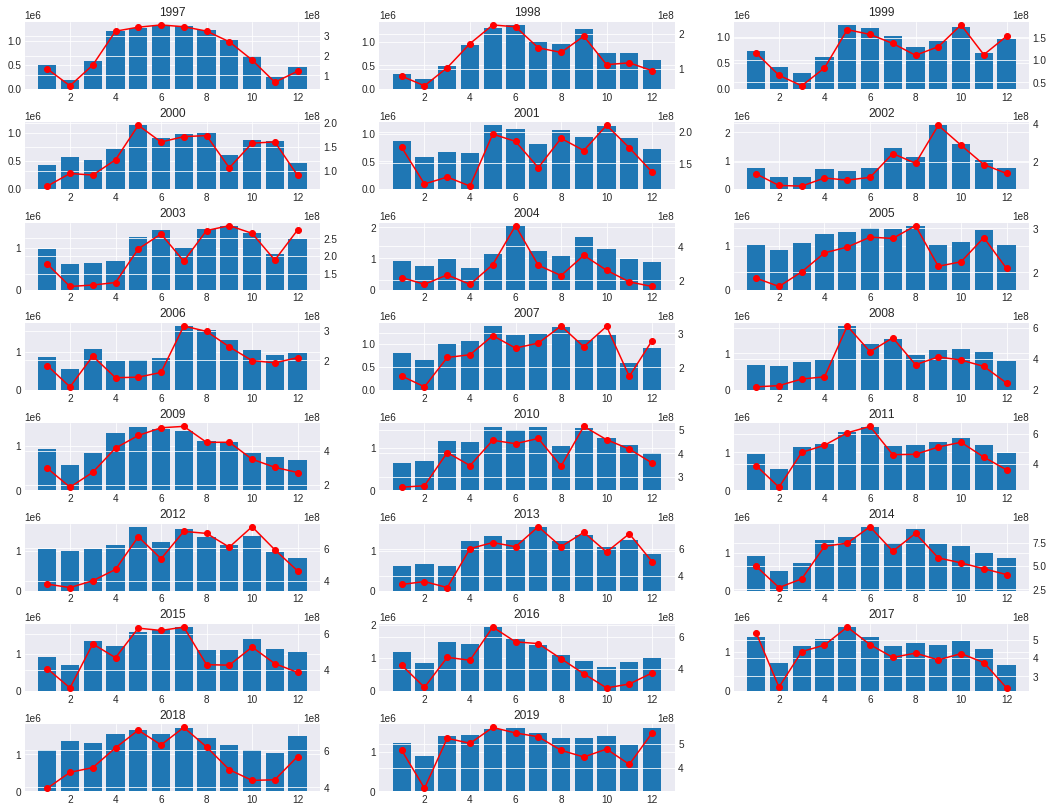

In [8]:
anos = df_comexstat['year'].unique()
for produto in select_prod:
    plot_evol_mensal_exp(evol_exp_br_month, anos, produto)

---

## 2) What are the 3 most important products exported by Brazil in the last 5 years?

In [ ]:
# Manipular os dados
df_comexstat['year'] = pd.DatetimeIndex(df_comexstat['date']).year
rank_top_3_exp = df_comexstat[df_comexstat['type'] == 'Export']

# selecionar últimos 5 anos
last_5_year = np.arange(max(rank_top_3_exp['year'] - 5)+1, max(rank_top_3_exp['year'])+1,1)

# Filtrar
rank_top_3_exp = rank_top_3_exp[rank_top_3_exp['year'].isin(last_5_year)]

In [ ]:
# Agrupar
rank_top_3_exp = rank_top_3_exp.groupby(['product'])['tons','usd'].sum().reset_index()

In [ ]:
rank_top_3_exp['perc_tons'] = np.round(rank_top_3_exp['tons'] / sum(rank_top_3_exp['tons']),2) * 100
rank_top_3_exp['perc_usd'] = np.round(rank_top_3_exp['usd'] / sum(rank_top_3_exp['usd']),2) * 100

In [ ]:
rank_top_3_exp

### Os 3 principais produtos exportador nos últimos 5 anos foram:
- Em relação ao volume em toneladas:
    - Soybeans
    - Sugar
    - Corn
    
- Em relação ao valor (em dólares):
    - Soybeans
    - Sugar
    - Soybean meal

### 3) What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?